# Analysis of UFC PPV sales

### Content
+ Introduction: UFC and PPV
+ Data description and objectives
+ Data acquisiton, manipulation and validation
+ Data analysis and visualization 
+ Conclusion

# 1. Introduction: UFC and PPV

Every fighter has a base salary they receive for making weight and fighting. The base amount depends on several factors. Each UFC fighter is considered an independent contractor and they’re free to negotiate with the UFC on the base pay. Usually, the more popular the fighter, the higher it is. And one of the main sources of income for the UFC and fighters is the PPV.

Pay-per-view (PPV) system - pay and see - rules boxing and martial arts. It began with a test in Chicago in the middle of the 20th century, developed thanks to Muhammad Ali, and now brings fighters more than their official fees.

For example, when McGregor lost to Khabib Nurmagomedov, he had a base salary of 3,000,000\\$ as well as 40,000\\$ from the Reebok sponsorship. His PPV points, however, allowed him to make almost 50,000,000$ from the fight. 

Floyd Mayweather holds the absolute PPV record. In 2015, he dealt with Manny Pacquiao, 4.6 million broadcasts were sold for the fight, the income of which is $ 437 million. In the UFC for a long time, the best result was 1.65 million sales: the rematch of Conor and Nate Diaz (2016), but on October 7, 2018, the record fell, thanks to the efforts of the same Conor, and this time - Khabib. 2.4 million PPV.

Sources: 
(https://themmaguru.com/how-much-money-do-mma-fighters-make/)       (https://www.sports.ru/tribuna/blogs/mmardoboi/2556712.html)

## 2. Data description and objectives

Our dataset contains list of every UFC PPV event until 2017(219 events), because it is the most recent and available dataset on [kaggle](https://www.kaggle.com/). Below is data that we will be scraped and used for our analysis:
+ Year 
+ Month
+ Day
+ UFC_Number - event number
+ Opponent1 - main event first fighter
+ Opponent2 - main event second fighter
+ PPV - PPV sales

## 2.1 Research questions:
1. Are UFC PPV sales growth?
2. In which month of year do PPV sales show the best results?
3. Who are the most selling fighters?
4. Analyze average PPV sales in one year.
5. How Conor McGregor influenced on PPV sales?


## 3. Data Analysis


In [13]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('ufc_ppv_buys.csv')
df

,Year,Month,Day,UFC_Number,Opponent1,Opponent2,PPV
0,2001,9,28,33,Ortiz,Matyushenko,75000
1,2001,11,2,34,Couture,Rizzo,65000
2,2002,1,11,35,Pulver,Penn,35000
3,2002,3,22,36,Couture,Barnett,55000
4,2002,5,10,37,Lindland,Bustamante,50000
...,...,...,...,...,...,...,...
172,2017,9,9,215,Nunes,Shevchenko,100000
173,2017,10,7,216,Ferguson,Lee,200000
174,2017,11,4,217,Bisping,St. Pierre,875000
175,2017,12,2,218,Holloway,Aldo,230000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        177 non-null    int64 
 1   Month       177 non-null    int64 
 2   Day         177 non-null    int64 
 3   UFC_Number  177 non-null    int64 
 4   Opponent1   177 non-null    object
 5   Opponent2   177 non-null    object
 6   PPV         177 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 9.8+ KB


### 3.1 PPV sales

Text(0.5, 1.0, 'Average PPV sales for each year')

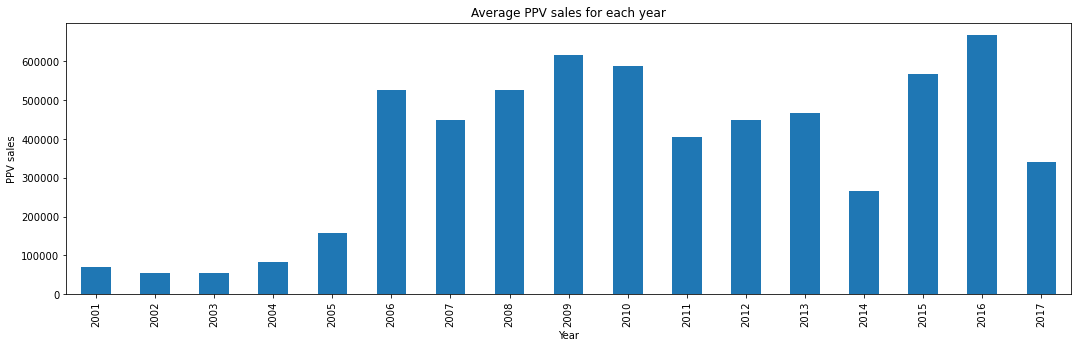

In [16]:
result = df['PPV'].groupby(df['Year']).mean() #count mean for every year
plt.figure(figsize = (18, 5))
result['PPV_mean'] = df['PPV'].groupby(df['Year']).mean().plot(kind = 'bar')
plt.ylabel('PPV sales')
plt.title('Average PPV sales for each year')

In the diagram, we can see that PPV sales have grown significantly after 2005.

However, starting from 2006 to 2017 there was no any pattern, the results either fell or rose and we can not clearly say that UFC PPV sales are growing up or down.
The most noticable thing in this period is that the in 2014, sales showed markedly low rates compared to neighboring years 

### 3.2 Average sales on each month


Text(0.5, 1.0, 'Number of PPV events for each month')

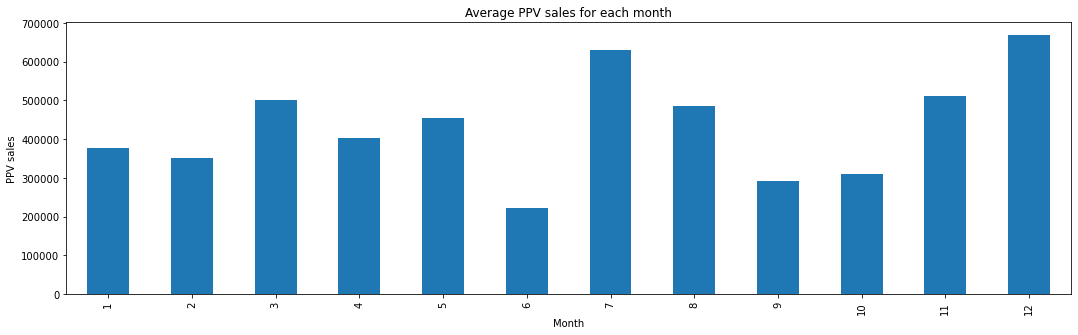

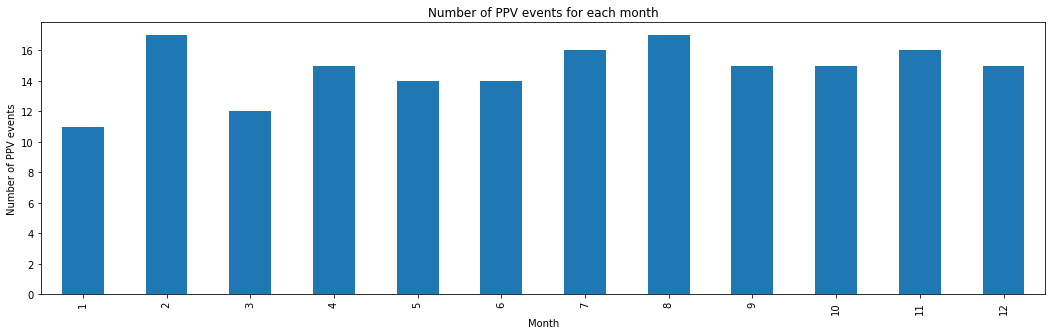

In [17]:
result = df['PPV'].groupby(df['Month']).mean() #count mean for every month
plt.figure(figsize = (18, 5))
result['PPV_mean'] = df['PPV'].groupby(df['Month']).mean().plot(kind = 'bar')
plt.ylabel('PPV sales')
plt.title('Average PPV sales for each month')

result1 = df['PPV'].groupby(df['Month']).count() #count the number of PPV events for every month
plt.figure(figsize = (18, 5))
result1['PPV_mean'] = df['PPV'].groupby(df['Month']).count().plot(kind = 'bar')
plt.ylabel('Number of PPV events')
plt.title('Number of PPV events for each month')

The first graph shows us, that the most beneficial months for organizing fights in the UFS are 12-th and 7-th months, that is December and July. And the worst month for orginizing fights is June.

Also it is noticable that the UFC organizes a lot of fights in February, despite the fact that February is far from the most selling month.  

### 3.3 Who are the most selling fighters 

In [18]:
#plt.figure(figsize = (18, 5))
#result = df['PPV'].groupby(df['Opponent1']).mean().to_frame()
#sorted_result = result.sort_values('Opponent1', ascending = False)
#result.size()